In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv(r'D:\Python\CE_1_loan_data_train.csv', encoding="ISO-8859-1")
loan_data.head()

,key,grade,home_ownership,purpose,verification_status,term,emp_length_int,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,acc_now_delinq,inq_last_6mths,annual_inc,dti,good_bad
0,21753,D,RENT,debt_consolidation,Verified,36,0 year(s),58,17.77,343,0,2.0,45000.0,19.07,0
1,251,B,RENT,credit_card,Source Verified,36,4 year(s),46,12.85,178,0,0.0,24000.0,5.10,1
2,22941,B,MORTGAGE,car,Not Verified,36,5 year(s),52,11.55,264,0,1.0,79000.0,13.99,1
3,618,C,RENT,credit_card,Not Verified,36,1 year(s),37,14.31,87,0,0.0,25000.0,16.61,1
4,17090,A,MORTGAGE,home_improvement,Verified,36,3 year(s),42,8.39,267,0,0.0,158000.0,2.83,1


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   key                          24000 non-null  int64  
 1   grade                        24000 non-null  object 
 2   home_ownership               24000 non-null  object 
 3   purpose                      24000 non-null  object 
 4   verification_status          24000 non-null  object 
 5   term                         24000 non-null  int64  
 6   emp_length_int               24000 non-null  object 
 7   mths_since_issue_d           24000 non-null  int64  
 8   int_rate                     24000 non-null  float64
 9   mths_since_earliest_cr_line  24000 non-null  int64  
 10  acc_now_delinq               24000 non-null  int64  
 11  inq_last_6mths               23794 non-null  float64
 12  annual_inc                   24000 non-null  float64
 13  dti             

In [4]:
loan_data.describe()

,key,term,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,acc_now_delinq,inq_last_6mths,annual_inc,dti,good_bad
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,23794.000000,2.400000e+04,24000.000000,24000.000000
mean,15009.821708,42.618000,51.177292,13.844843,242.808958,0.004250,0.805833,7.284977e+04,17.350518,0.855792
std,8680.406114,10.725617,14.176100,4.372248,86.049158,0.073477,1.083357,6.801266e+04,7.912937,0.351308
min,0.000000,36.000000,36.000000,5.420000,75.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000
25%,7451.500000,36.000000,41.000000,10.990000,184.000000,0.000000,0.000000,4.500000e+04,11.430000,1.000000
50%,15060.500000,36.000000,47.000000,13.650000,226.000000,0.000000,0.000000,6.200000e+04,17.040000,1.000000
75%,22508.250000,60.000000,57.000000,16.590000,286.000000,0.000000,1.000000,8.785050e+04,22.980000,1.000000
max,29998.000000,60.000000,125.000000,26.060000,587.000000,3.000000,14.000000,7.446395e+06,39.990000,1.000000


In [5]:
loan_data['emp_length_int'].value_counts()

10 year(s)    7730
0 year(s)     3022
2 year(s)     2167
3 year(s)     1854
5 year(s)     1568
1 year(s)     1503
4 year(s)     1457
7 year(s)     1374
6 year(s)     1310
8 year(s)     1171
9 year(s)      844
Name: emp_length_int, dtype: int64

In [6]:
loan_data['emp_length_int'][0][:-8]

'0'

In [7]:
s=loan_data['emp_length_int'][0].replace('year(s)','')

In [8]:
s

'0 '

In [9]:
change_type = lambda x: int(x[:-8])
loan_data['emp_length_int']=loan_data['emp_length_int'].apply(change_type)

In [10]:
loan_data['emp_length_int']

0        0
1        4
2        5
3        1
4        3
        ..
23995    7
23996    0
23997    2
23998    1
23999    8
Name: emp_length_int, Length: 24000, dtype: int64

In [11]:
loan_data['good_bad'].value_counts()/len(loan_data)

1    0.855792
0    0.144208
Name: good_bad, dtype: float64

In [12]:
loan_data['home_ownership'].value_counts()

MORTGAGE    12238
RENT         9593
OWN          2169
Name: home_ownership, dtype: int64

In [13]:
loan_data['purpose'].value_counts()

debt_consolidation    14232
credit_card            5272
home_improvement       1326
other                  1228
major_purchase          516
small_business          357
car                     300
medical                 215
vacation                142
moving                  137
house                   118
wedding                 109
renewable_energy         25
educational              23
Name: purpose, dtype: int64

In [14]:
loan_data['verification_status'].value_counts()

Verified           8679
Not Verified       7705
Source Verified    7616
Name: verification_status, dtype: int64

In [15]:
loan_data['emp_length_int'].value_counts()

10    7730
0     3022
2     2167
3     1854
5     1568
1     1503
4     1457
7     1374
6     1310
8     1171
9      844
Name: emp_length_int, dtype: int64

In [16]:
loan_data['acc_now_delinq'].value_counts()

0    23911
1       77
2       11
3        1
Name: acc_now_delinq, dtype: int64

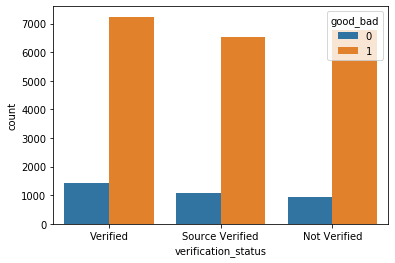

In [17]:
sns.countplot(data=loan_data, x='verification_status', hue='good_bad')

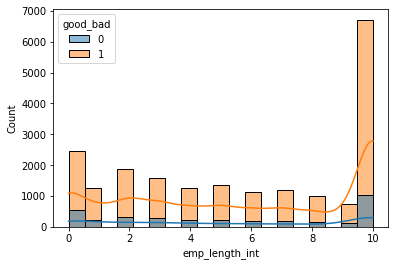

In [18]:
sns.histplot(
    data=loan_data, 
    x='emp_length_int', 
    hue='good_bad', 
    kde=True,  
    common_norm=False 
)

### clients being unemployed or having a short employment length are more likely to be bad loan.

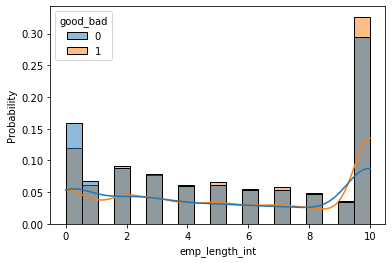

In [19]:
sns.histplot(
    data=loan_data, 
    x='emp_length_int', 
    hue='good_bad', 
    kde=True,  
    stat='probability',
    common_norm=False
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

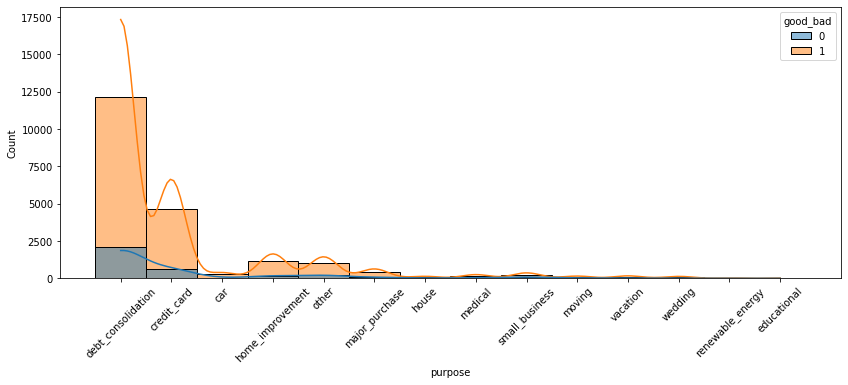

In [20]:
plt.figure(figsize=(14,5))
sns.histplot(
    data=loan_data, 
    x='purpose', 
    hue='good_bad', 
    kde=True,
)
plt.xticks(rotation=45)

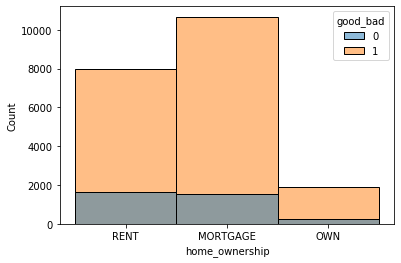

In [21]:
sns.histplot(
    data=loan_data, 
    x='home_ownership', 
    hue='good_bad', 
)

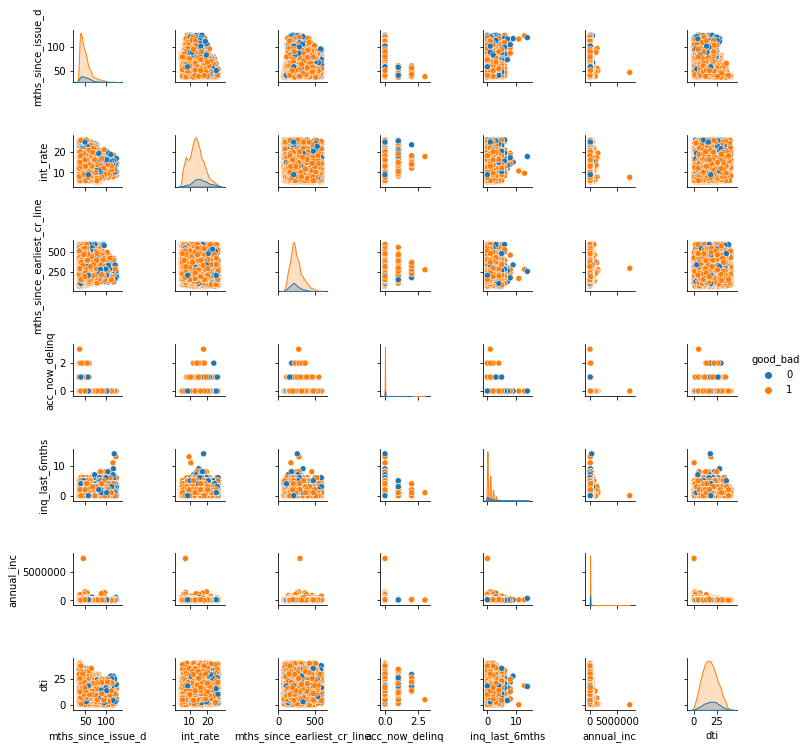

In [22]:
sns.pairplot(loan_data[['mths_since_issue_d','int_rate','mths_since_earliest_cr_line','acc_now_delinq','inq_last_6mths','annual_inc',
                        'dti','good_bad']],
                        hue='good_bad', height=1.5)
plt.show()

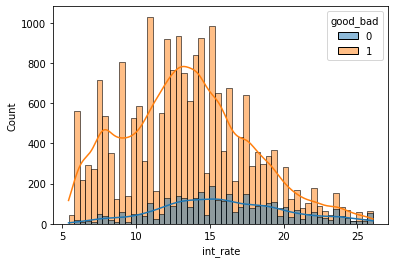

In [23]:
sns.histplot(
    data=loan_data, 
    x='int_rate', 
    hue='good_bad', 
    kde=True,
)

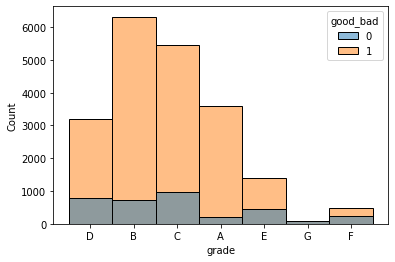

In [24]:
sns.histplot(
    data=loan_data, 
    x='grade', 
    hue='good_bad'
)

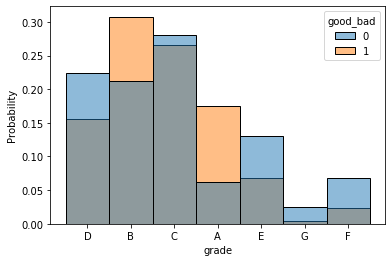

In [25]:
#    stat='probability',
 #   common_norm=False
sns.histplot(
    data=loan_data, 
    x='grade', 
    hue='good_bad',
    stat='probability',
    common_norm=False
)

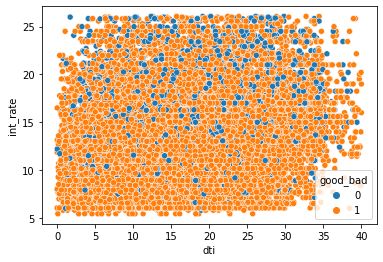

In [26]:
sns.scatterplot(
    data=loan_data,
    x='dti',
    y='int_rate',
    hue='good_bad',
)

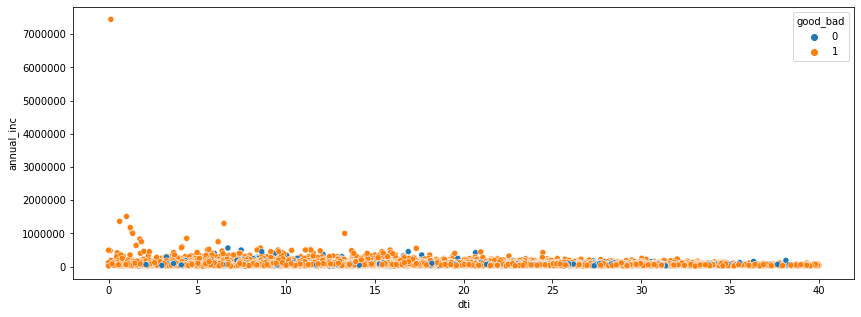

In [27]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    data=loan_data,
    x='dti',
    y='annual_inc',
    hue='good_bad',
)

In [28]:
loan_data['inq_last_6mths']=loan_data['inq_last_6mths'].fillna(loan_data['inq_last_6mths'].mean())

In [29]:
loan_data.isnull().sum()

key                            0
grade                          0
home_ownership                 0
purpose                        0
verification_status            0
term                           0
emp_length_int                 0
mths_since_issue_d             0
int_rate                       0
mths_since_earliest_cr_line    0
acc_now_delinq                 0
inq_last_6mths                 0
annual_inc                     0
dti                            0
good_bad                       0
dtype: int64

In [30]:
loan_data.columns

Index(['key', 'grade', 'home_ownership', 'purpose', 'verification_status',
       'term', 'emp_length_int', 'mths_since_issue_d', 'int_rate',
       'mths_since_earliest_cr_line', 'acc_now_delinq', 'inq_last_6mths',
       'annual_inc', 'dti', 'good_bad'],
      dtype='object')

## Outlier detection, distribution of variables

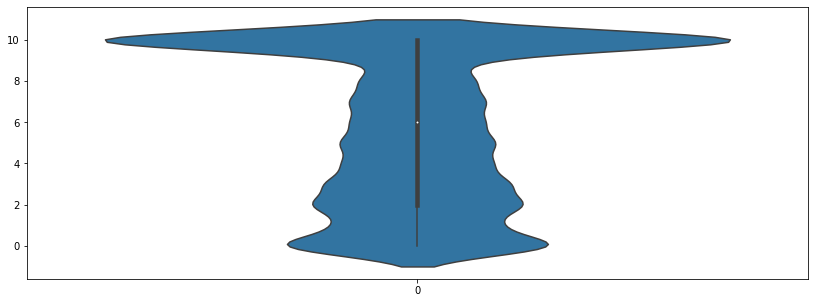

In [31]:
plt.figure(figsize=(14,5))
sns.violinplot(
    data=loan_data['emp_length_int']
)

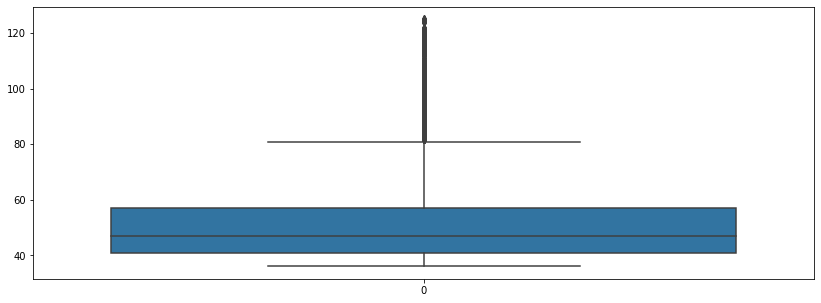

In [32]:
plt.figure(figsize=(14,5))
sns.boxplot(
    data=loan_data['mths_since_issue_d']
)

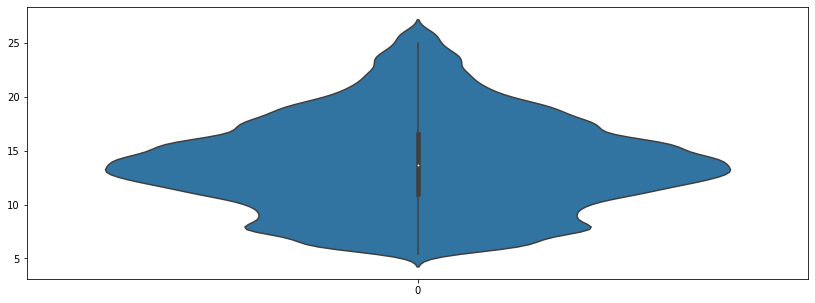

In [33]:
plt.figure(figsize=(14,5))
sns.violinplot(
    data=loan_data['int_rate']
)

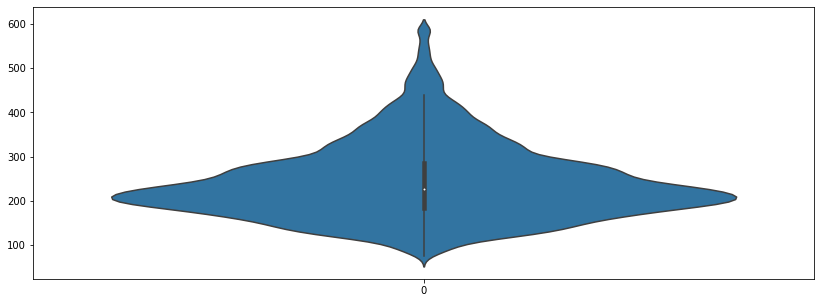

In [34]:
plt.figure(figsize=(14,5))
sns.violinplot(
    data=loan_data['mths_since_earliest_cr_line']
)

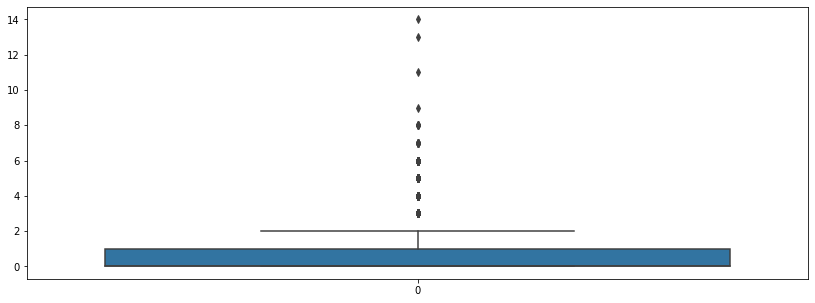

In [35]:
plt.figure(figsize=(14,5))
sns.boxplot(
    data=loan_data['inq_last_6mths']
)

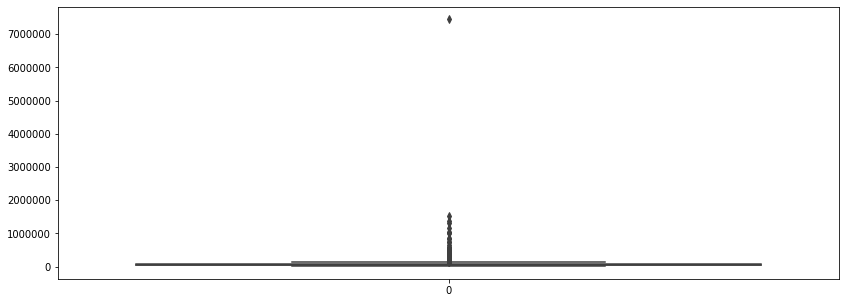

In [36]:
plt.figure(figsize=(14,5))
sns.boxplot(
    data=loan_data['annual_inc']
)

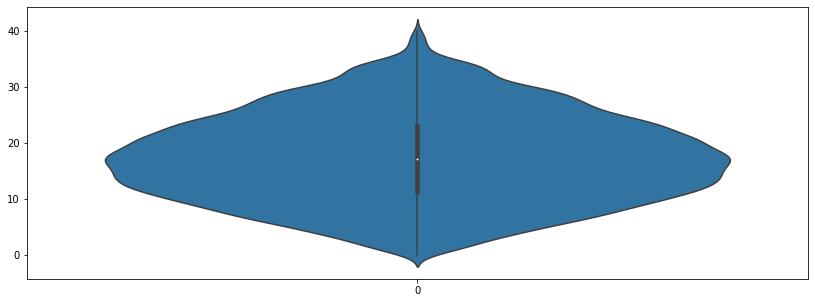

In [37]:
plt.figure(figsize=(14,5))
sns.violinplot(
    data=loan_data['dti']
)

##using log and robust scaler technique to normalize the distribution of variables having outliers.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [39]:
X=loan_data[['mths_since_earliest_cr_line','annual_inc']]
scaler = RobustScaler()
X_scaled = scaler.fit_transform(np.log1p(X))

In [40]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled

,mths_since_earliest_cr_line,annual_inc
0,0.946633,-0.479049
1,-0.540993,-1.418695
2,0.352472,0.362217
3,-2.157951,-1.357675
4,0.378107,1.398359
...,...,...
23995,0.145716,0.012007
23996,-0.417199,0.093457
23997,-0.810805,-1.188272
23998,-0.155681,0.729457


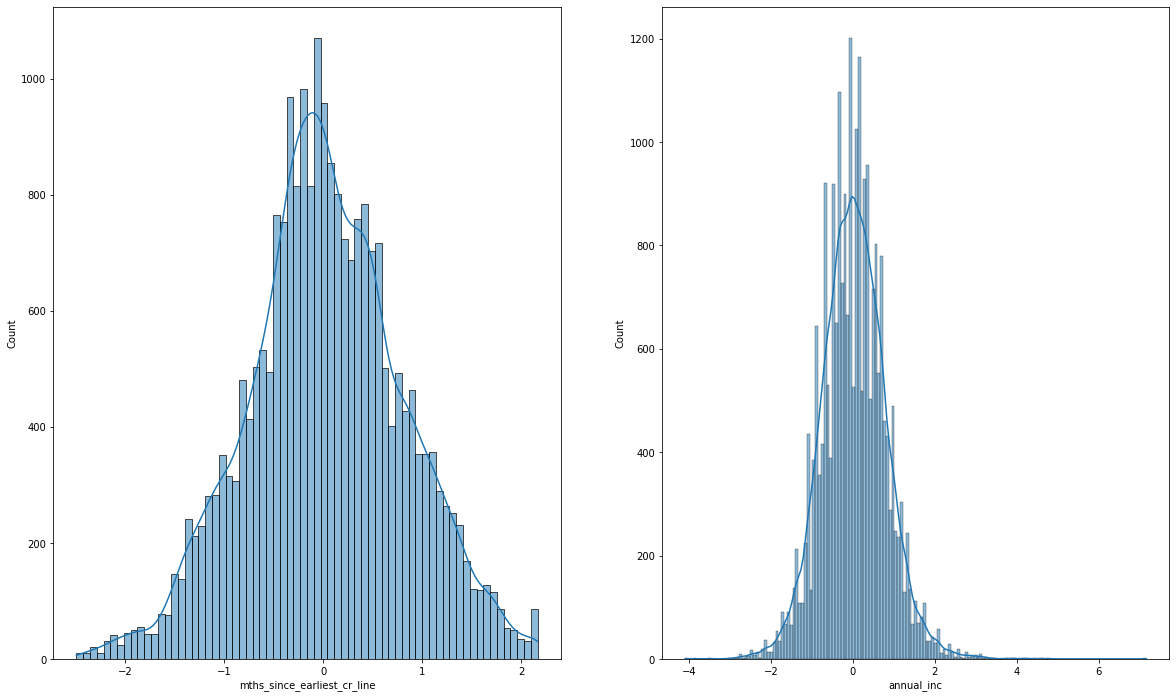

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(20, 12))

for col_name, ax in zip(X_scaled.columns, axs.ravel()):
    sns.histplot(data=X_scaled, x=col_name, kde=True, ax=ax)


In [42]:
loan_data=pd.concat([loan_data, X_scaled], axis=1)

## Convert categorical variables to dummies

In [43]:
loan_data.head(20)

,key,grade,home_ownership,purpose,verification_status,term,emp_length_int,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,acc_now_delinq,inq_last_6mths,annual_inc,dti,good_bad,mths_since_earliest_cr_line,annual_inc
0,21753,D,RENT,debt_consolidation,Verified,36,0,58,17.77,343,0,2.000000,45000.0,19.07,0,0.946633,-0.479049
1,251,B,RENT,credit_card,Source Verified,36,4,46,12.85,178,0,0.000000,24000.0,5.10,1,-0.540993,-1.418695
2,22941,B,MORTGAGE,car,Not Verified,36,5,52,11.55,264,0,1.000000,79000.0,13.99,1,0.352472,0.362217
3,618,C,RENT,credit_card,Not Verified,36,1,37,14.31,87,0,0.000000,25000.0,16.61,1,-2.157951,-1.357675
4,17090,A,MORTGAGE,home_improvement,Verified,36,3,42,8.39,267,0,0.000000,158000.0,2.83,1,0.378107,1.398359
5,6362,C,MORTGAGE,debt_consolidation,Verified,36,4,41,14.99,173,0,0.000000,135000.0,21.03,1,-0.605508,1.163191
6,24680,C,RENT,debt_consolidation,Not Verified,36,10,47,13.98,241,0,1.000000,70000.0,16.34,1,0.145716,0.181414
7,28329,E,RENT,debt_consolidation,Verified,60,2,38,19.52,117,0,0.000000,56500.0,6.58,1,-1.489925,-0.138860
8,15874,C,OWN,other,Not Verified,36,10,46,14.64,189,0,0.000000,72000.0,15.38,1,-0.405182,0.223524
9,22653,A,MORTGAGE,debt_consolidation,Not Verified,36,7,36,7.49,214,0,0.000000,60000.0,15.12,1,-0.123682,-0.049015


In [44]:
grade_dict={
    'A':'1',
    'B':'2',
    'C':'3',
    'D':'4',
    'E':'5',
    'F':'6',
    'G':'7'
}
loan_data['grade_new']=loan_data['grade'].map(grade_dict)
loan_data['grade_new']

0        4
1        2
2        2
3        3
4        1
        ..
23995    2
23996    1
23997    4
23998    1
23999    3
Name: grade_new, Length: 24000, dtype: object

In [45]:
X_dummies=pd.get_dummies(loan_data[['home_ownership','purpose','verification_status']])

In [46]:
pd.concat([loan_data,X_dummies], axis=1)

,key,grade,home_ownership,purpose,verification_status,term,emp_length_int,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,21753,D,RENT,debt_consolidation,Verified,36,0,58,17.77,343,...,0,0,0,0,0,0,0,0,0,1
1,251,B,RENT,credit_card,Source Verified,36,4,46,12.85,178,...,0,0,0,0,0,0,0,0,1,0
2,22941,B,MORTGAGE,car,Not Verified,36,5,52,11.55,264,...,0,0,0,0,0,0,0,1,0,0
3,618,C,RENT,credit_card,Not Verified,36,1,37,14.31,87,...,0,0,0,0,0,0,0,1,0,0
4,17090,A,MORTGAGE,home_improvement,Verified,36,3,42,8.39,267,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29802,B,MORTGAGE,credit_card,Not Verified,36,7,51,13.05,241,...,0,0,0,0,0,0,0,1,0,0
23996,5390,A,RENT,debt_consolidation,Not Verified,36,0,57,7.62,188,...,0,0,0,0,0,0,0,1,0,0
23997,860,D,RENT,debt_consolidation,Source Verified,36,2,40,18.24,158,...,0,0,0,0,0,0,0,0,1,0
23998,15795,A,RENT,debt_consolidation,Verified,36,1,58,8.90,211,...,0,0,0,0,0,0,0,0,0,1


# Build model using decision tree

In [47]:
loan_data.columns

Index(['key', 'grade', 'home_ownership', 'purpose', 'verification_status',
       'term', 'emp_length_int', 'mths_since_issue_d', 'int_rate',
       'mths_since_earliest_cr_line', 'acc_now_delinq', 'inq_last_6mths',
       'annual_inc', 'dti', 'good_bad', 'mths_since_earliest_cr_line',
       'annual_inc', 'grade_new'],
      dtype='object')

In [48]:
X_final=loan_data.iloc[:,5:]
X_final=X_final.drop(columns='good_bad',axis=1)
X_final

,term,emp_length_int,mths_since_issue_d,int_rate,mths_since_earliest_cr_line,acc_now_delinq,inq_last_6mths,annual_inc,dti,mths_since_earliest_cr_line,annual_inc,grade_new
0,36,0,58,17.77,343,0,2.0,45000.00,19.07,0.946633,-0.479049,4
1,36,4,46,12.85,178,0,0.0,24000.00,5.10,-0.540993,-1.418695,2
2,36,5,52,11.55,264,0,1.0,79000.00,13.99,0.352472,0.362217,2
3,36,1,37,14.31,87,0,0.0,25000.00,16.61,-2.157951,-1.357675,3
4,36,3,42,8.39,267,0,0.0,158000.00,2.83,0.378107,1.398359,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,36,7,51,13.05,241,0,1.0,62500.00,13.56,0.145716,0.012007,2
23996,36,0,57,7.62,188,0,0.0,66000.00,18.22,-0.417199,0.093457,1
23997,36,2,40,18.24,158,0,0.0,28000.00,37.33,-0.810805,-1.188272,4
23998,36,1,58,8.90,211,0,0.0,101000.00,18.21,-0.155681,0.729457,1


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(X_final)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [51]:
pca_3d=pca.transform(X_final)
pca_3d

array([[-2.78497526e+04, -1.04943914e+02,  6.88209864e+00],
       [-4.88497804e+04,  5.65127959e+01, -1.97194980e+00],
       [ 6.15023347e+03, -2.00874806e+01,  2.49239393e+00],
       ...,
       [-4.48497844e+04,  7.71514161e+01, -1.25974022e+01],
       [ 2.81502239e+04,  3.66600596e+01,  8.28462431e+00],
       [ 4.99513413e+04,  5.53145618e+01, -3.73096194e+00]])

In [52]:
pca_3d = pd.DataFrame(pca_3d)
pca_3d

,0,1,2
0,-27849.752560,-104.943914,6.882099
1,-48849.780365,56.512796,-1.971950
2,6150.233470,-20.087481,2.492394
3,-47849.796248,147.726253,-11.985067
4,85150.233052,-9.360216,-5.048296
...,...,...,...
23995,-10349.770234,0.069382,1.492638
23996,-6849.779554,53.631174,7.324807
23997,-44849.784435,77.151416,-12.597402
23998,28150.223883,36.660060,8.284624


In [53]:
X, y = pca_3d,loan_data['good_bad']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    stratify=y, 
    random_state=3110
)

In [54]:
tree = DecisionTreeClassifier(
    max_depth=5, # Giới hạn số tầng của cây
    max_features=3,# Giới hạn số biến sử dụng để xây cây
    random_state=410
)
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=410, splitter='best')

In [55]:
y_pred=tree.predict(x_test)

In [56]:
display(
    metrics.f1_score(y_test, y_pred, average='weighted'), 
    metrics.precision_score(y_test, y_pred, average='weighted'), 
    metrics.recall_score(y_test, y_pred, average='weighted')
)

0.790275851081995

0.7701980033149001

0.8540277777777778

In [57]:
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedKFold, StratifiedKFold 
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=420
)
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, y, cv=cv, n_jobs=2)

In [58]:
tree_scores # accuracy score

array([0.74645833, 0.74833333, 0.7525    , 0.754375  , 0.73479167,
       0.74895833, 0.74875   , 0.75083333, 0.74479167, 0.744375  ,
       0.75333333, 0.75854167, 0.75166667, 0.74666667, 0.75125   ,
       0.73416667, 0.749375  , 0.74916667, 0.74583333, 0.74645833,
       0.74      , 0.746875  , 0.76229167, 0.75041667, 0.754375  ,
       0.75      , 0.75333333, 0.746875  , 0.74708333, 0.7475    ,
       0.740625  , 0.74125   , 0.75      , 0.75833333, 0.75270833,
       0.74833333, 0.74458333, 0.75458333, 0.74375   , 0.75375   ,
       0.74729167, 0.75104167, 0.73958333, 0.75625   , 0.739375  ,
       0.741875  , 0.74770833, 0.74416667, 0.7425    , 0.753125  ])

In [59]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
tree_scores = cross_validate(tree, X_scaled, y, cv=cv, n_jobs=2, scoring=scoring)
tree_scores = pd.DataFrame(tree_scores)
tree_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.163898,0.074955,0.730208,0.853104,0.825800,0.839230
1,0.246848,0.035070,0.751875,0.865480,0.843984,0.854597
2,0.136298,0.016053,0.745833,0.856367,0.844693,0.850490
3,0.131260,0.023986,0.747083,0.857637,0.844693,0.851116
4,0.101935,0.025987,0.741042,0.854291,0.838599,0.846373
5,0.157900,0.038979,0.739167,0.847751,0.843581,0.845661
6,0.243357,0.019987,0.739792,0.859535,0.833495,0.846315
7,0.207873,0.015992,0.738958,0.857357,0.834225,0.845633
8,0.125922,0.016990,0.738750,0.851217,0.839539,0.845338
9,0.082949,0.018989,0.749167,0.866816,0.838834,0.852595


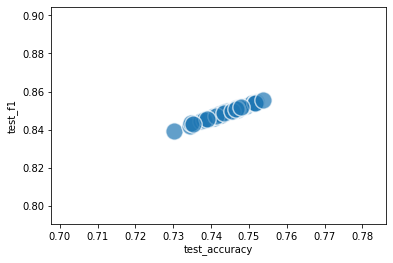

In [60]:
ax = sns.scatterplot(data=tree_scores, x='test_accuracy', y='test_f1', s=300, alpha=0.7)
ax

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'max_features': [2, 3],
    'max_depth': [3, 5, 7, 10]
}
gs = GridSearchCV(tree, param_grid, scoring=scoring, cv=cv, n_jobs=2, verbose=5, refit=False)
gs_result = gs.fit(X, y)
gs_result

Fitting 50 folds for each of 8 candidates, totalling 400 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  36 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 252 tasks      | elapsed:   13.1s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:   22.4s finished


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=420),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
            

In [63]:
gs_result_df = pd.DataFrame(gs_result.cv_results_)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split43_test_f1,split44_test_f1,split45_test_f1,split46_test_f1,split47_test_f1,split48_test_f1,split49_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.045943,0.010431,0.021067,0.007884,3,2,"{'max_depth': 3, 'max_features': 2}",0.852292,0.863750,0.855417,...,0.922680,0.925453,0.919022,0.925213,0.920863,0.920135,0.925694,0.922129,0.002766,1
1,0.062172,0.015187,0.019528,0.005050,3,3,"{'max_depth': 3, 'max_features': 3}",0.851667,0.863958,0.855833,...,0.922680,0.925453,0.919022,0.925076,0.921106,0.919770,0.925694,0.922102,0.002844,2
2,0.060922,0.012874,0.019628,0.005028,5,2,"{'max_depth': 5, 'max_features': 2}",0.851667,0.863333,0.855208,...,0.922680,0.925213,0.919229,0.924302,0.920113,0.919229,0.925196,0.921570,0.002883,3
3,0.092923,0.036889,0.020128,0.013040,5,3,"{'max_depth': 5, 'max_features': 3}",0.850000,0.862500,0.853125,...,0.922489,0.925076,0.919004,0.924594,0.920270,0.919126,0.925196,0.921485,0.002907,4
4,0.061202,0.007195,0.014472,0.002577,7,2,"{'max_depth': 7, 'max_features': 2}",0.850625,0.858958,0.850000,...,0.920810,0.922368,0.916808,0.923457,0.918980,0.918931,0.924439,0.920235,0.002801,5
5,0.089285,0.010638,0.014352,0.001883,7,3,"{'max_depth': 7, 'max_features': 3}",0.850208,0.857917,0.849583,...,0.921295,0.923923,0.917118,0.922109,0.918913,0.917504,0.924767,0.920226,0.002935,6
6,0.093222,0.012124,0.016710,0.003604,10,2,"{'max_depth': 10, 'max_features': 2}",0.846042,0.848542,0.847708,...,0.919784,0.919071,0.914874,0.917495,0.915185,0.916006,0.919869,0.916682,0.002553,7
7,0.125502,0.019767,0.017110,0.004364,10,3,"{'max_depth': 10, 'max_features': 3}",0.845833,0.855208,0.842500,...,0.920478,0.918821,0.912456,0.915761,0.917448,0.913137,0.919169,0.916497,0.003056,8


In [64]:
params = gs_result_df['params'].apply(pd.Series)
params

,max_depth,max_features
0,3,2
1,3,3
2,5,2
3,5,3
4,7,2
5,7,3
6,10,2
7,10,3


In [65]:
gs_result_df = gs_result_df.join(params)
gs_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,split45_test_f1,split46_test_f1,split47_test_f1,split48_test_f1,split49_test_f1,mean_test_f1,std_test_f1,rank_test_f1,max_depth,max_features
0,0.045943,0.010431,0.021067,0.007884,3,2,"{'max_depth': 3, 'max_features': 2}",0.852292,0.863750,0.855417,...,0.919022,0.925213,0.920863,0.920135,0.925694,0.922129,0.002766,1,3,2
1,0.062172,0.015187,0.019528,0.005050,3,3,"{'max_depth': 3, 'max_features': 3}",0.851667,0.863958,0.855833,...,0.919022,0.925076,0.921106,0.919770,0.925694,0.922102,0.002844,2,3,3
2,0.060922,0.012874,0.019628,0.005028,5,2,"{'max_depth': 5, 'max_features': 2}",0.851667,0.863333,0.855208,...,0.919229,0.924302,0.920113,0.919229,0.925196,0.921570,0.002883,3,5,2
3,0.092923,0.036889,0.020128,0.013040,5,3,"{'max_depth': 5, 'max_features': 3}",0.850000,0.862500,0.853125,...,0.919004,0.924594,0.920270,0.919126,0.925196,0.921485,0.002907,4,5,3
4,0.061202,0.007195,0.014472,0.002577,7,2,"{'max_depth': 7, 'max_features': 2}",0.850625,0.858958,0.850000,...,0.916808,0.923457,0.918980,0.918931,0.924439,0.920235,0.002801,5,7,2
5,0.089285,0.010638,0.014352,0.001883,7,3,"{'max_depth': 7, 'max_features': 3}",0.850208,0.857917,0.849583,...,0.917118,0.922109,0.918913,0.917504,0.924767,0.920226,0.002935,6,7,3
6,0.093222,0.012124,0.016710,0.003604,10,2,"{'max_depth': 10, 'max_features': 2}",0.846042,0.848542,0.847708,...,0.914874,0.917495,0.915185,0.916006,0.919869,0.916682,0.002553,7,10,2
7,0.125502,0.019767,0.017110,0.004364,10,3,"{'max_depth': 10, 'max_features': 3}",0.845833,0.855208,0.842500,...,0.912456,0.915761,0.917448,0.913137,0.919169,0.916497,0.003056,8,10,3


In [66]:
mean_cols = [i for i in gs_result_df.columns if i.startswith('mean')]
rank_cols = [i for i in gs_result_df.columns if i.startswith('rank')]
gs_result_df[['max_features', 'max_depth', *mean_cols, *rank_cols]]

,max_features,max_depth,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,rank_test_accuracy,rank_test_precision,rank_test_recall,rank_test_f1
0,2,3,0.045943,0.021067,0.855538,0.855832,0.999577,0.922129,1,8,1,1
1,3,3,0.062172,0.019528,0.855496,0.855844,0.999498,0.922102,2,7,2,2
2,2,5,0.060922,0.019628,0.854637,0.856002,0.998033,0.921570,3,4,3,3
3,3,5,0.092923,0.020128,0.854488,0.855957,0.997896,0.921485,4,5,4,4
4,2,7,0.061202,0.014472,0.852433,0.856112,0.994763,0.920235,5,1,6,5
5,3,7,0.089285,0.014352,0.852400,0.856020,0.994864,0.920226,6,2,5,6
6,2,10,0.093222,0.016710,0.846512,0.855951,0.986720,0.916682,7,6,7,7
7,3,10,0.125502,0.017110,0.846225,0.856013,0.986204,0.916497,8,3,8,8
